## Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from math import pi

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

## Dataframe

In [3]:
link = "http://naturalstattrick.com/playerteams.php?fromseason=20212022&thruseason=20212022&stype=2&sit=all&score=all&stdoi=std&rate=n&team=ALL&pos=S&loc=B&toi=0&gpfilt=none&fd=&td=&tgp=410&lines=single&draftteam=ALL"

df = pd.read_html(link)[0]

df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('%','pct')

df.head()

,Unnamed:_0,Player,Team,Position,GP,TOI,Goals,Total_Assists,First_Assists,Second_Assists,...,Misconduct,Penalties_Drawn,Giveaways,Takeaways,Hits,Hits_Taken,Shots_Blocked,Faceoffs_Won,Faceoffs_Lost,Faceoffs_pct
0,1,Zdeno Chara,NYI,D,72,1348.550000,2,12,8,4,...,2,11,45,14,125,46,90,0,0,-
1,2,Joe Thornton,FLA,C,34,377.600000,5,5,3,2,...,0,1,18,18,20,14,10,77,98,44.00
2,3,Jason Spezza,TOR,C,71,762.966667,12,13,9,4,...,0,6,31,32,31,41,24,305,272,52.86
3,4,Duncan Keith,EDM,D,64,1262.516667,1,20,10,10,...,0,2,64,36,22,60,114,0,0,-
4,5,Ryan Suter,DAL,D,82,1939.483333,7,25,6,19,...,0,5,46,19,46,64,88,0,0,-


## Create percentile function

Wants to return a new dataframe with the percentile per stat and per player

In [4]:
def percentile(dataframe):
    percentile_df = dataframe.copy()
    for column in percentile_df.columns.tolist():
        if (column == "Player") | (column == "Team") | (column == "Position"):
            pass
        elif (column == "Faceoffs_pct") :
            col = percentile_df[column].tolist()
            for i in range(len(col)):
                if bool(re.search(r'\d', col[i])) == True:
                    col[i] = float(col[i])
                else:
                    col[i] = np.nan
            percentile_df["Faceoffs_pct"] = col 
            percentile_df[column] = percentile_df[column].rank(pct=True, na_option="keep")
            percentile_df[column] = (percentile_df[column]*100).round()
        else:
            percentile_df[column] = percentile_df[column].rank(pct=True, numeric_only=True, na_option="keep")
            percentile_df[column] = (percentile_df[column]*100).round()
    
    return percentile_df

In [5]:
df_per = percentile(df)

df_per.head()

,Unnamed:_0,Player,Team,Position,GP,TOI,Goals,Total_Assists,First_Assists,Second_Assists,...,Misconduct,Penalties_Drawn,Giveaways,Takeaways,Hits,Hits_Taken,Shots_Blocked,Faceoffs_Won,Faceoffs_Lost,Faceoffs_pct
0,0.0,Zdeno Chara,NYI,D,70.0,81.0,36.0,57.0,65.0,50.0,...,97.0,67.0,85.0,49.0,88.0,41.0,89.0,23.0,21.0,NaN
1,0.0,Joe Thornton,FLA,C,36.0,34.0,54.0,38.0,41.0,37.0,...,43.0,20.0,51.0,57.0,31.0,23.0,30.0,81.0,81.0,46.0
2,0.0,Jason Spezza,TOR,C,68.0,49.0,76.0,60.0,68.0,50.0,...,43.0,46.0,71.0,79.0,40.0,39.0,50.0,90.0,89.0,82.0
3,0.0,Duncan Keith,EDM,D,57.0,75.0,27.0,73.0,71.0,77.0,...,43.0,27.0,96.0,84.0,33.0,51.0,94.0,23.0,21.0,NaN
4,0.0,Ryan Suter,DAL,D,98.0,99.0,61.0,81.0,56.0,94.0,...,43.0,42.0,86.0,59.0,50.0,54.0,89.0,23.0,21.0,NaN


## Make Plots
Because Plots are fun

### Radar Chart

In [6]:
# import plotly.graph_objects as go

# def radar(player):
#     ser_player = df_per[df_per.Player == player].iloc[0]
#     cats = ['Goals','First_Assists','Second_Assists','Shots','ixG']
#     vals = [ser_player[cat] for cat in cats]

#     fig = go.Figure(data=go.Scatterpolar(
#       r=vals,
#       theta=cats,
#       fill='toself'
#     ))

#     fig.update_layout(
#         polar=dict(
#         radialaxis=dict(
#         visible=False
#             ),
#       ),
#       showlegend=False
#     )

#     return fig.show()


def createRadar(player, player2):
    ser_player = df_per[df_per.Player == player].iloc[0]
    cats = ['Goals','First_Assists','Second_Assists','Shots','ixG']
    vals = [ser_player[cat] for cat in cats]
    vals = vals[:] + [vals[0]] 


    angles = [n / float(len(cats)) * 2 * pi for n in range(len(cats))]
    angles += angles [:1]


    
    ser_player2 = df_per[df_per.Player == player2].iloc[0]
    vals2 = [ser_player2[cat] for cat in cats]
    vals2 = vals2[:] + [vals2[0]] 


    angles2 = [n / float(len(cats)) * 2 * pi for n in range(len(cats))]
    angles2 += angles2 [:1]


    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],cats)
    ax.plot(angles,vals, color="r")
    ax.fill(angles, vals, 'r', alpha=0.1)
    ax.plot(angles2,vals2, color="teal")
    ax.fill(angles2, vals2, 'teal', alpha=0.1)

    plt.figtext(0.1,0.98,player,color="teal", fontsize=13)
    plt.figtext(0.1,0.93,"vs", fontsize=13)
    plt.figtext(0.1,0.88,player2,color="red", fontsize=13)
    plt.savefig("att.png", facecolor="white", bbox_inches='tight')
    plt.show()

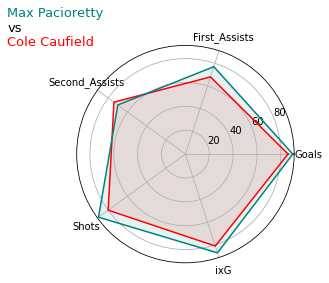

In [8]:
createRadar("Max Pacioretty", "Cole Caufield")

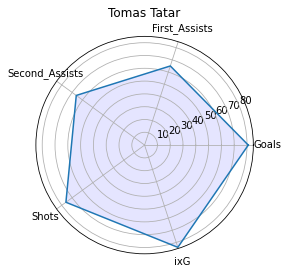

In [7]:
def single_radar(player):
    ser_player = df_per[df_per.Player == player].iloc[0]
    cats = ['Goals','First_Assists','Second_Assists','Shots','ixG']
    vals = [ser_player[cat] for cat in cats]
    vals = vals[:] + [vals[0]] 


    angles = [n / float(len(cats)) * 2 * pi for n in range(len(cats))]
    angles += angles [:1]
    #angles = angles [:-1]


    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],cats)
    ax.plot(angles,vals)
    ax.fill(angles, vals, 'blue', alpha=0.1)

    ax.set_title(player)
    plt.show()
    
single_radar("Tomas Tatar")

### Cool Plot

- Gotta make the dataframe smaller

In [9]:
forwards = (df[(df.Position != "D") & (df.GP > 20)]).reset_index(drop=True)

forwards_per = percentile(forwards)


# spines = ["top","right","bottom","left"]
# for s in spines:
#     if s in ["top","right","bottom","left"]:
#         ax.spines[s].set_visible(False)
#     else:
#         ax.spines[s].set_color(text_color)

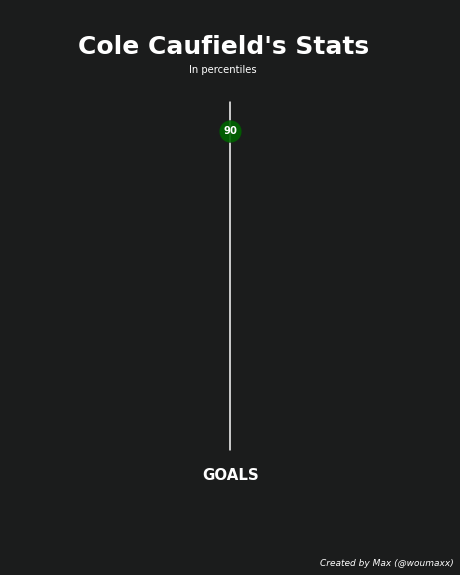

In [10]:
title_font = "Luminari"
body_font = "LEMON MILK"
text_color = "w"
background = "#1b1c1c"
filler = "grey"
primary = "red"


mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)


plt.axvline(x=0.5, color='w', ymin=0.1, ymax=0.9,label='axvline - full height', solid_capstyle='round')
ax.scatter(0.5,90,s=500,color="darkgreen",edgecolors=background, alpha=0.9, lw=.25, zorder=4)
ax.text(0.5, 90, "90", color="w", zorder=5, fontweight="bold", horizontalalignment='center', verticalalignment='center')
ax.text(0.5, -5, "GOALS", size=15, color="w", fontweight="bold", zorder=5, horizontalalignment='center', verticalalignment='center')

fig.text(0.5,0.90, "\nCole Caufield's Stats\n", fontweight="bold",fontsize=25, color="w", horizontalalignment='center', verticalalignment='center')

fig.text(0.5,.87,"\nIn percentiles",fontweight="regular", style ="normal", fontsize=10, color="w", horizontalalignment='center', verticalalignment='center')

ax.set_ylim(-10,110)
ax.axis("off")

fig.text(0.9, -0.001, f"Created by Max (@woumaxx)",
        fontstyle="italic",fontsize=9, color="w", horizontalalignment='right')
plt.savefig('cole.png', bbox_inches = "tight", dpi = 500)



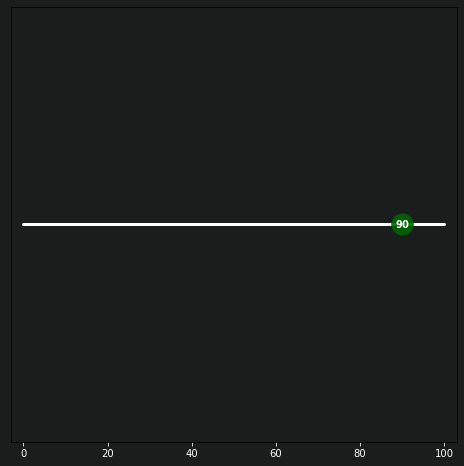

In [11]:
title_font = "Luminari"
body_font = "LEMON MILK"
text_color = "w"
background = "#1b1c1c"
filler = "grey"
primary = "red"


mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.plot([0,100], [1,1], color='w', solid_capstyle='round', lw=3)
ax.scatter(90, 1,s=500,color="darkgreen",edgecolors=background, alpha=0.9, lw=.25, zorder=4)
ax.text(90, 1, "90", color="w", zorder=5, fontweight="bold", horizontalalignment='center', verticalalignment='center')
ax.set_yticks(np.arange(1))
ax.set_yticklabels(["Goals"])
ax.set_xlim(-3,103);


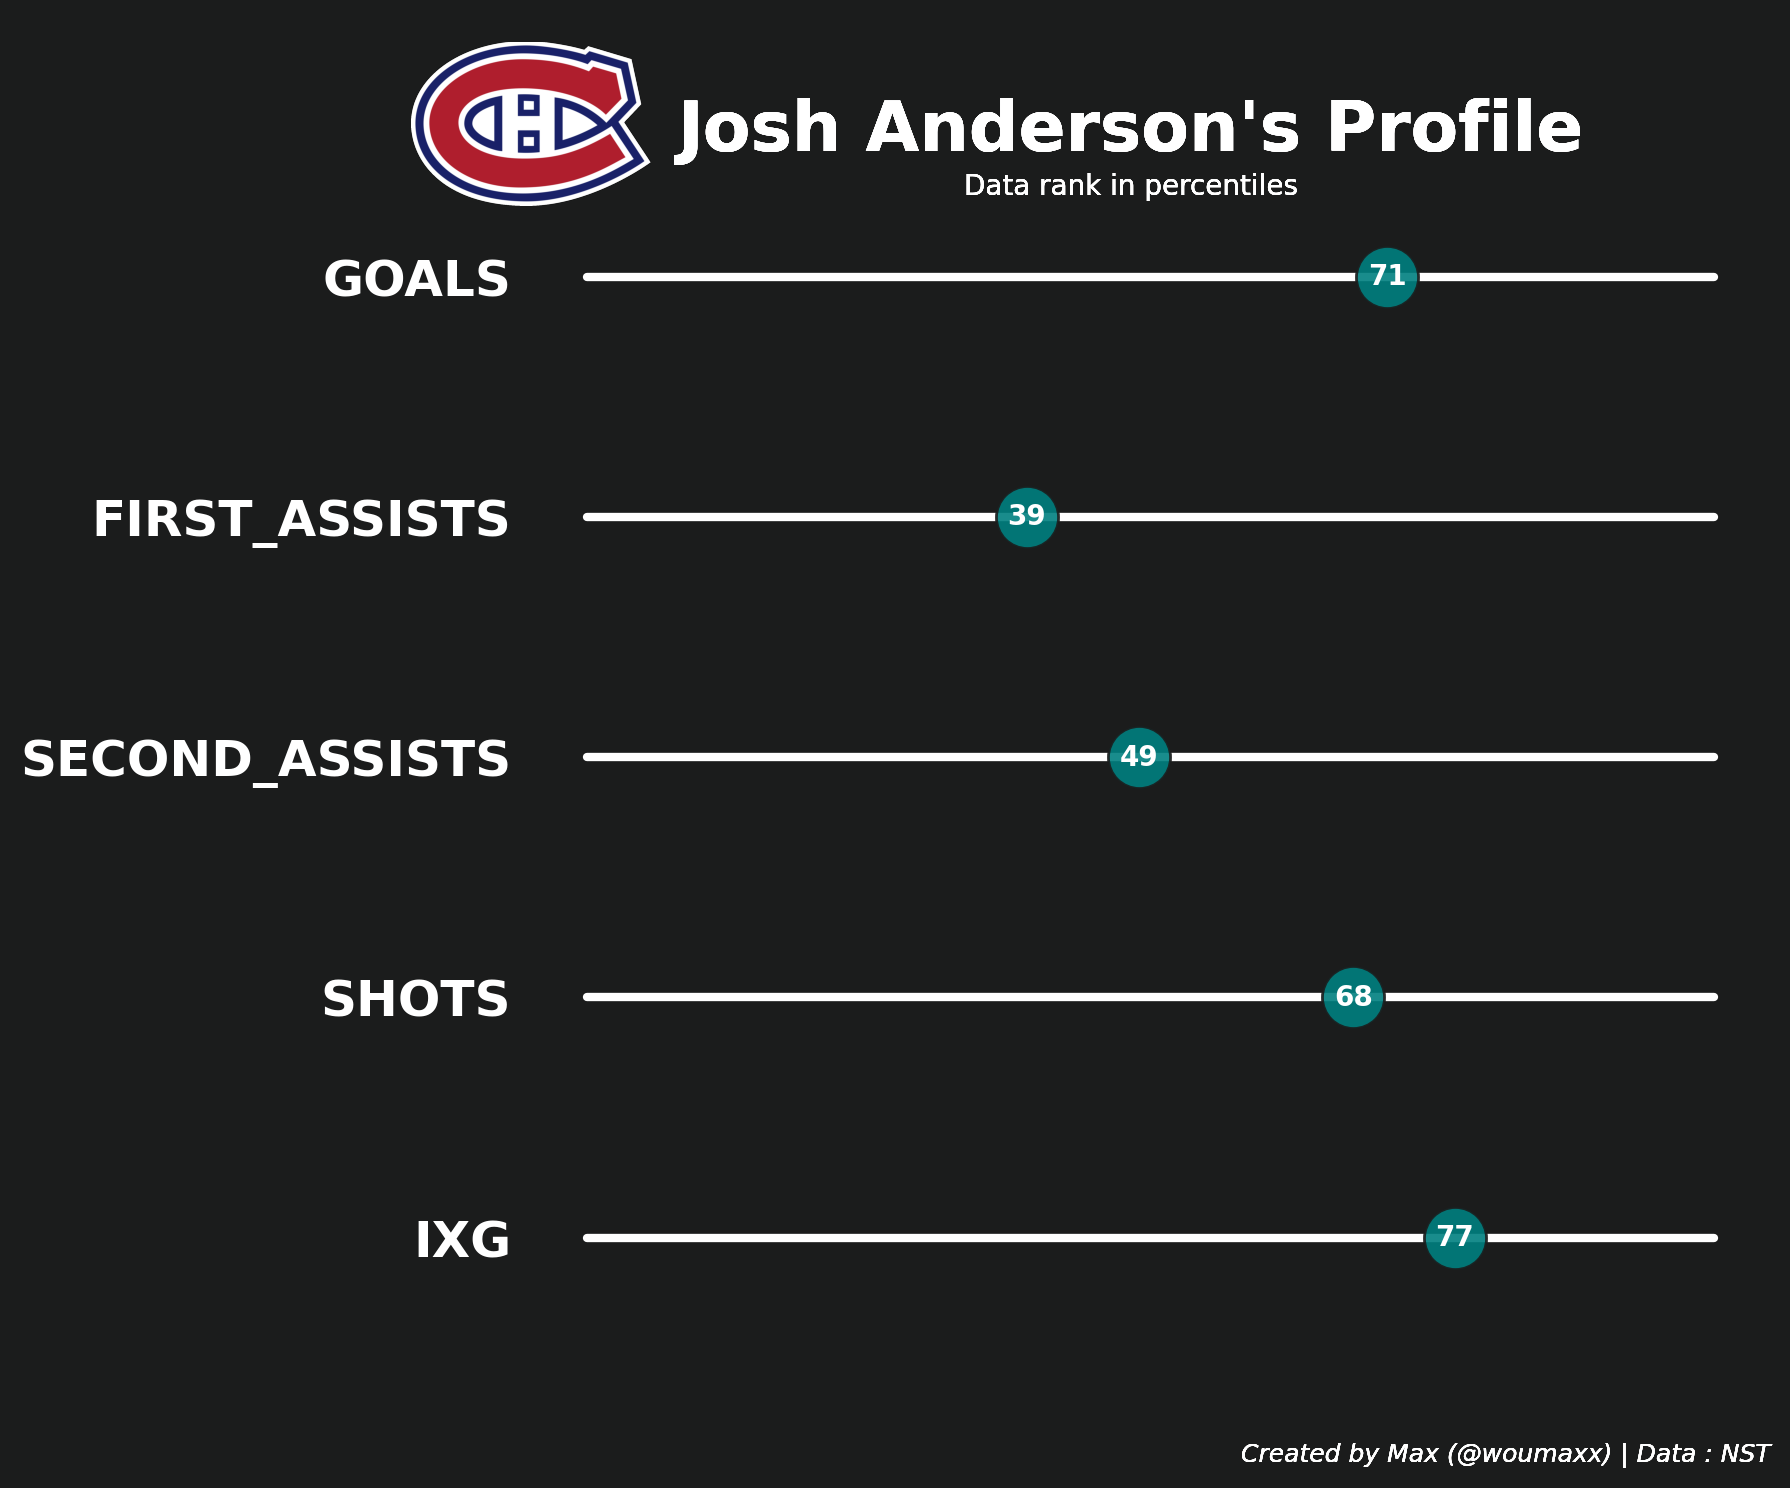

In [12]:
import matplotlib.colors
from PIL import Image


def PlayerCard(player):
    cats = ['Goals','First_Assists','Second_Assists','Shots','ixG']
    vals = []
    for cat in cats:
        vals.append(int(forwards_per[cat][forwards_per.Player == player].iloc[0]))
    #vals = list(np.random.randint(low=1, high=99, size=len(cats)))

    cats = [x.upper() for x in cats]
    fig, ax = plt.subplots(figsize=(8,7), dpi=200)
    fig.set_facecolor(background)
    ax.patch.set_alpha(0)

    for y,z in zip(range(len(cats)), vals):
        #print(f"y = {len(y)}\nz = {len(z)}")
        ax.plot([0,100], [y,y], color='w', solid_capstyle='round', lw=3)
        ax.scatter(z, y,s=500,color="teal",edgecolors=background, alpha=0.9, lw=1, zorder=4)
        ax.text(z, y, str(z), color="w", zorder=5, fontweight="bold", horizontalalignment='center', verticalalignment='center')
        ax.set_yticks(np.arange(len(cats)))
        ax.set_yticklabels(cats, fontweight="bold", fontsize=18)
        ax.invert_yaxis()
        spines = ["top","right","bottom","left"]
        for s in spines:
            if s in spines:
                ax.spines[s].set_visible(False)
            else:
                ax.spines[s].set_color(text_color)
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
        plt.tick_params(left = False)
        fig.text(0.5,0.95, f"\n{player}'s Profile\n", fontweight="bold",fontsize=25, color="w", horizontalalignment='center', verticalalignment='center')

        fig.text(0.5,.91,"\nData rank in percentiles\n",fontweight="regular", style ="normal", fontsize=10, color="w", horizontalalignment='center', verticalalignment='center')
        fig.text(0.9, -0.001, f"Created by Max (@woumaxx) | Data : NST",
            fontstyle="italic",fontsize=9, color="w", horizontalalignment='right')

        ax2 = fig.add_axes([0.05,0.88,0.15,0.15]) # badge
        ax2.axis("off")
        logo = "/Users/max/Documents/My Tableau Repository/Shapes/NHL logos/MON.svg.png"
        img = Image.open(logo)
        ax2.imshow(img);

        #plt.savefig(f'{player}_Profile.png', bbox_inches = "tight", pad_inches=0.3, dpi = 500)
PlayerCard("Josh Anderson")


#redo it with subplots for header and logo

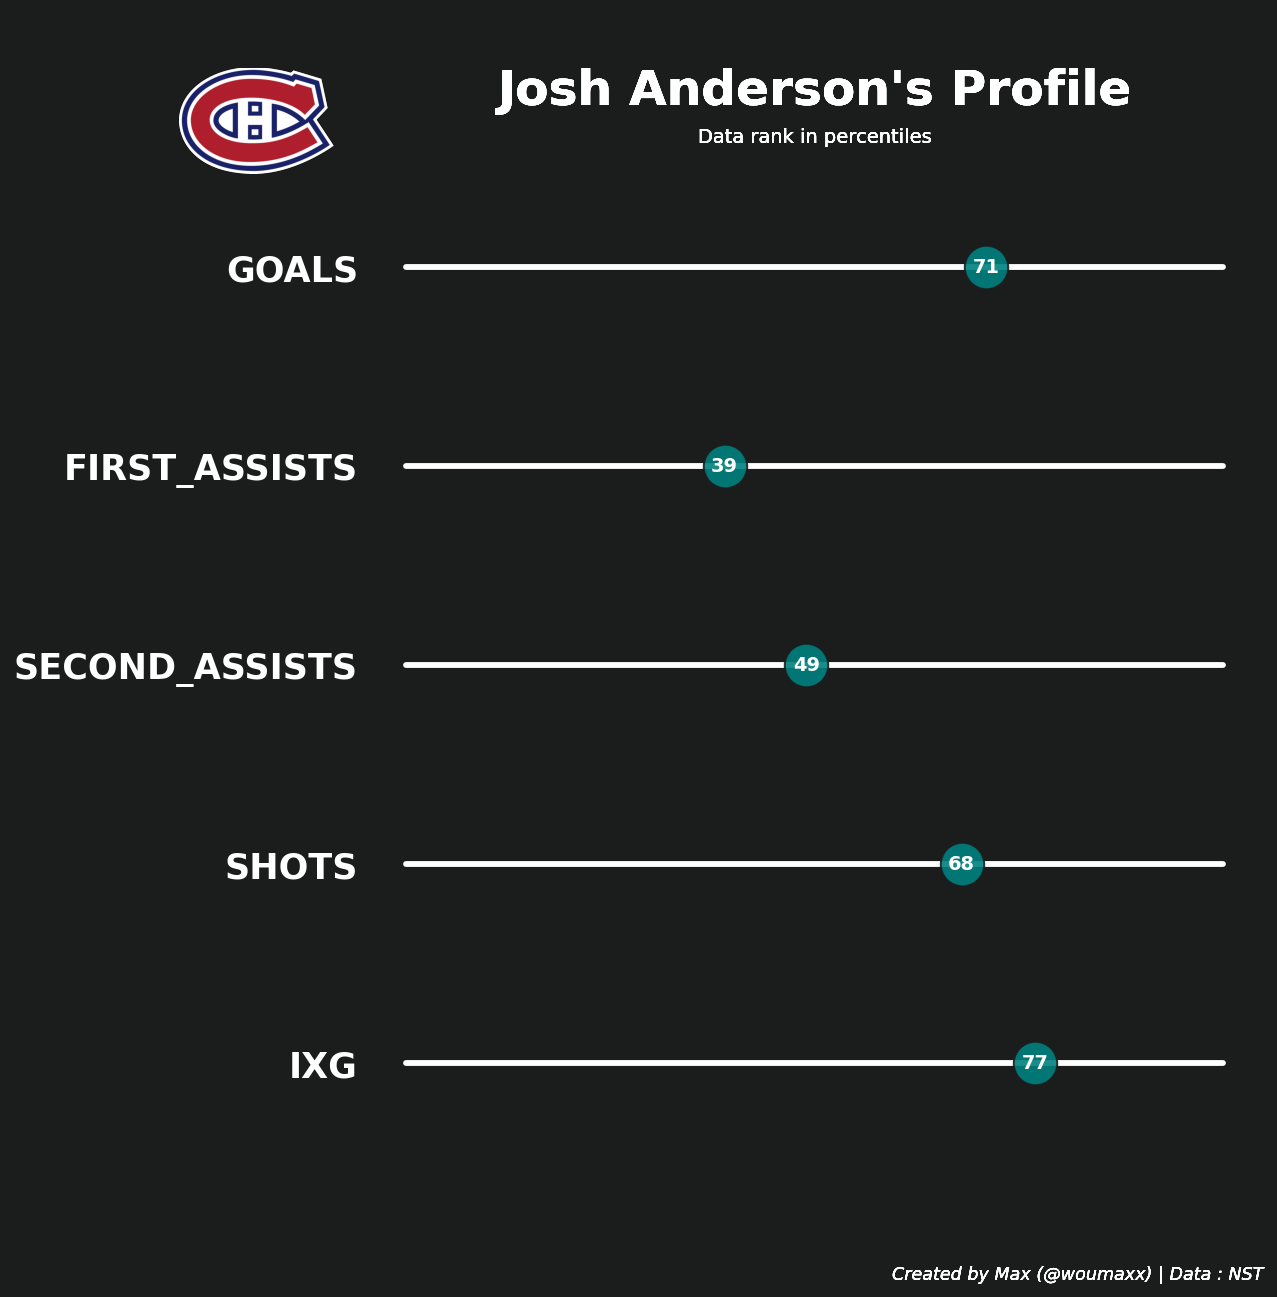

In [51]:
def PlayerCard(player):
    fig = plt.figure(figsize=(10,10), dpi = 140)
    grid = plt.GridSpec(6, 6)

    a1 = fig.add_subplot(grid[1:6, 1:6])
    a2 = fig.add_subplot(grid[0:1, 1:6])
    a3 = fig.add_subplot(grid[0:1, 0:1])
    
    cats = ['Goals','First_Assists','Second_Assists','Shots','ixG']
    vals = []
    for cat in cats:
        vals.append(int(forwards_per[cat][forwards_per.Player == player].iloc[0]))
    #vals = list(np.random.randint(low=1, high=99, size=len(cats)))

    cats = [x.upper() for x in cats]
    fig.set_facecolor(background)
    a1.patch.set_alpha(0)
    a2.patch.set_alpha(0)
    a3.patch.set_alpha(0)

    for y,z in zip(range(len(cats)), vals):
        #print(f"y = {len(y)}\nz = {len(z)}")
        a1.plot([0,100], [y,y], color='w', solid_capstyle='round', lw=3)
        a1.scatter(z, y,s=500,color="teal",edgecolors=background, alpha=0.9, lw=1, zorder=4)
        a1.text(z, y, str(z), color="w", zorder=5, fontweight="bold", horizontalalignment='center', verticalalignment='center')
        a1.set_yticks(np.arange(len(cats)))
        a1.set_yticklabels(cats, fontweight="bold", fontsize=18)
        a1.invert_yaxis()
        
        spines = ["top","right","bottom","left"]
        for s in spines:
            if s in spines:
                a1.spines[s].set_visible(False)
            else:
                a1.spines[s].set_color(text_color)
        a1.tick_params(axis=u'both', which=u'both',length=0)
        plt.tick_params(left = False)
        a2.text(0.5,0.7, f"\n{player}'s Profile\n", fontweight="bold",fontsize=25, color="w", horizontalalignment='center', verticalalignment='center')

        a2.text(0.5,.4,"\nData rank in percentiles\n",fontweight="regular", style ="normal", fontsize=10, color="w", horizontalalignment='center', verticalalignment='center')
        fig.text(0.9, -0.001, f"Created by Max (@woumaxx) | Data : NST",
            fontstyle="italic",fontsize=9, color="w", horizontalalignment='right')

        a1.axes.xaxis.set_visible(False)
        a2.axis("off")
        a3.axis("off")
        logo = "/Users/max/Documents/My Tableau Repository/Shapes/NHL logos/MON.svg.png"
        img = Image.open(logo)
        a3.imshow(img);

        #plt.savefig(f'{player}_Profile.png', bbox_inches = "tight", pad_inches=0.3, dpi = 500)
PlayerCard("Josh Anderson")


#redo it with subplots for header and logo


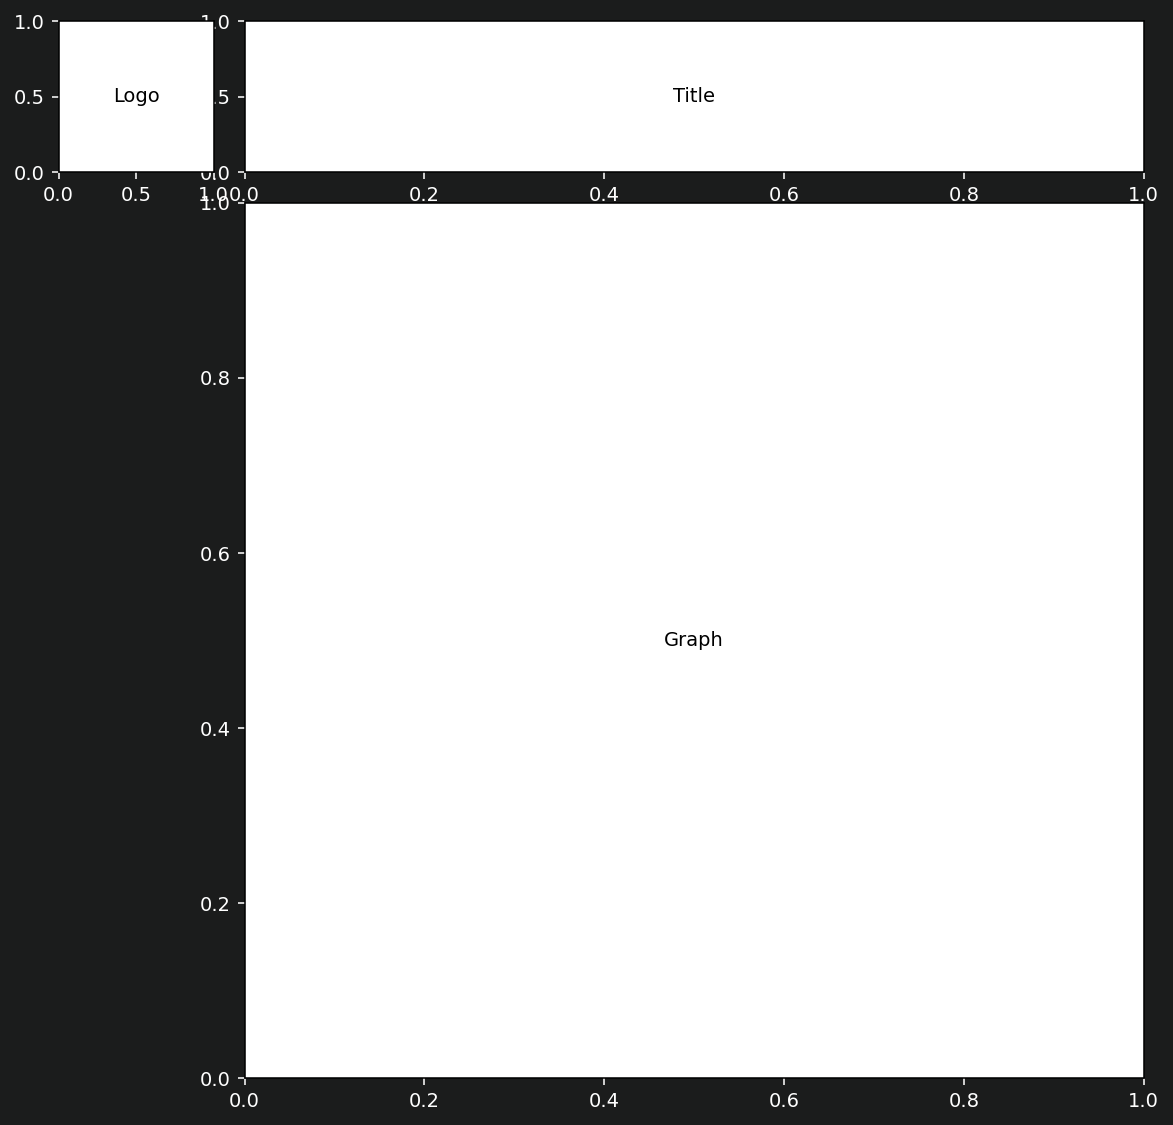

In [43]:
fig = plt.figure(figsize=(10,10), dpi = 140)
grid = plt.GridSpec(6, 6)
fig.set_facecolor(background)

a1 = fig.add_subplot(grid[1:6, 1:6])
a2 = fig.add_subplot(grid[0:1, 1:6])
a3 = fig.add_subplot(grid[0:1, 0:1])

a1.text(0.5, 0.5, "Graph", horizontalalignment='center',
        verticalalignment='center')
a2.text(0.5, 0.5, "Title", horizontalalignment='center',
        verticalalignment='center')
a3.text(0.5, 0.5, "Logo", horizontalalignment='center',
        verticalalignment='center');




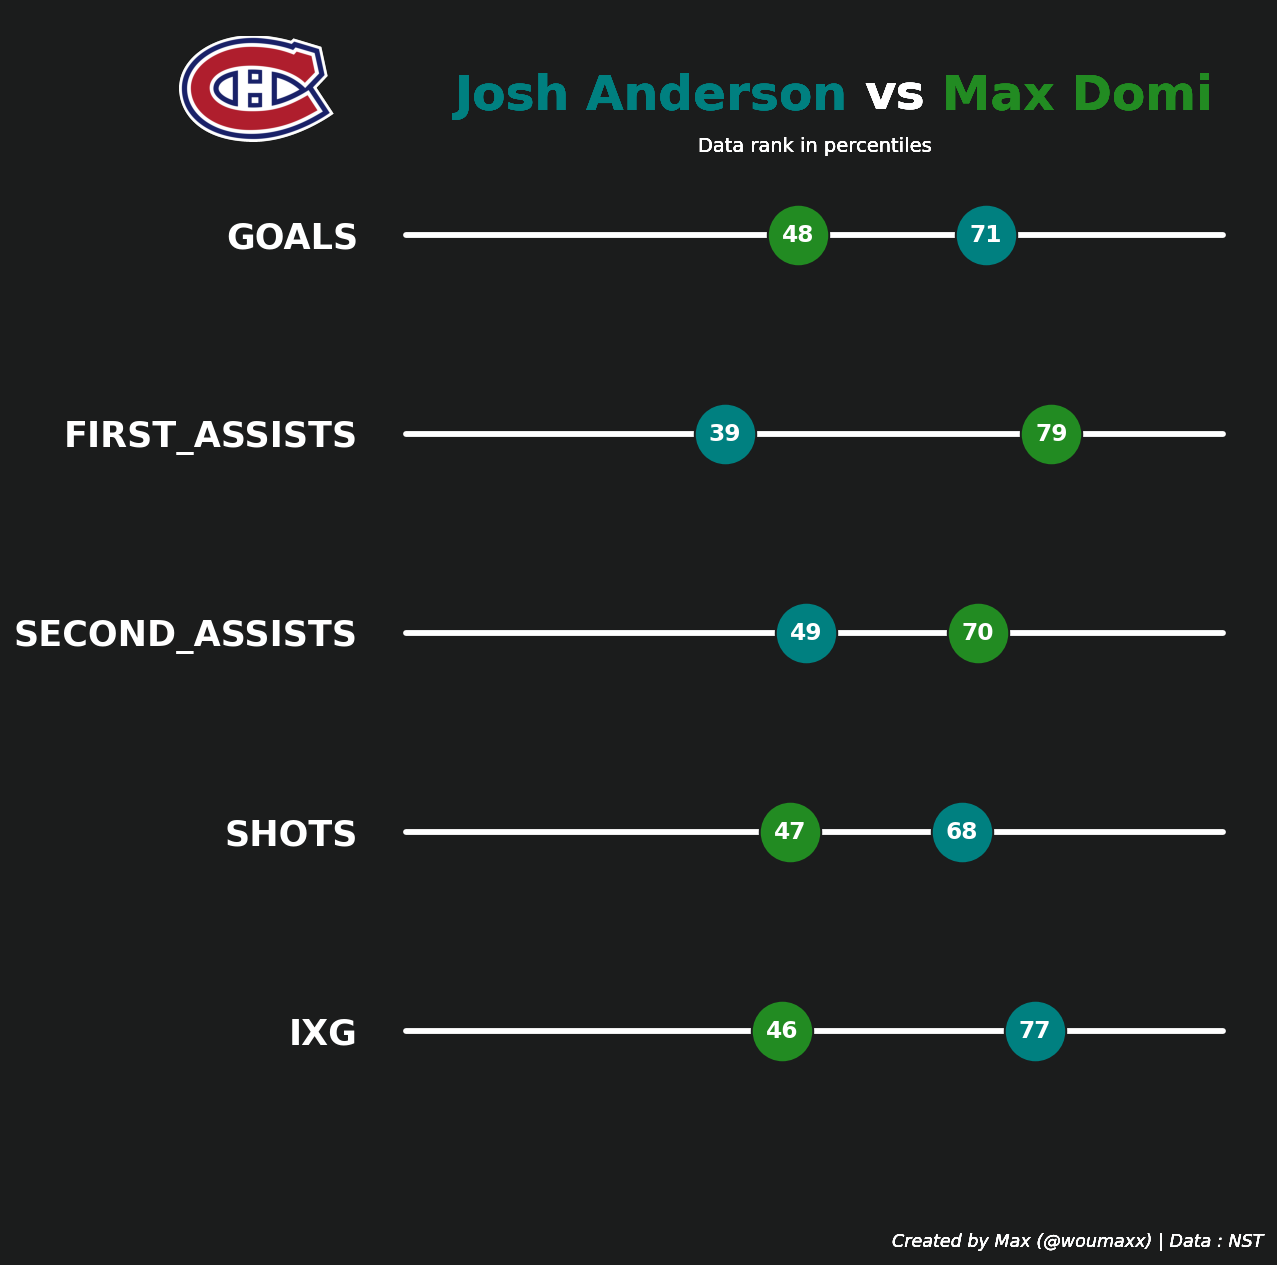

In [112]:
from highlight_text import HighlightText, ax_text, fig_text 

def PlayerCard(player, player2):
    fig = plt.figure(figsize=(10,10), dpi = 140)
    grid = plt.GridSpec(6, 6)

    a1 = fig.add_subplot(grid[1:6, 1:6])
    a2 = fig.add_subplot(grid[0:1, 1:6])
    a3 = fig.add_subplot(grid[0:1, 0:1])
    
    cats = ['Goals','First_Assists','Second_Assists','Shots','ixG']
    vals = []
    for cat in cats:
        vals.append(int(forwards_per[cat][forwards_per.Player == player].iloc[0]))
        
    vals2 = []
    for cat in cats:
        vals2.append(int(forwards_per[cat][forwards_per.Player == player2].iloc[0]))
    #vals = list(np.random.randint(low=1, high=99, size=len(cats)))

    cats = [x.upper() for x in cats]
    fig.set_facecolor(background)
    a1.patch.set_alpha(0)
    a2.patch.set_alpha(0)
    a3.patch.set_alpha(0)

    for y,z,v in zip(range(len(cats)), vals, vals2):
        #print(f"y = {len(y)}\nz = {len(z)}")
        a1.plot([0,100], [y,y], color='w', solid_capstyle='round', lw=3)
        a1.scatter(z, y,s=1000,color="teal",edgecolors=background, alpha=1, lw=1, zorder=4)
        a1.text(z, y, str(z), color="w", zorder=5, fontsize=12, fontweight="bold", horizontalalignment='center', verticalalignment='center')

        a1.scatter(v, y,s=1000,color="forestgreen",edgecolors=background, alpha=1, lw=1, zorder=4)
        a1.text(v, y, str(v), color="w", zorder=5, fontsize=12, fontweight="bold", horizontalalignment='center', verticalalignment='center')
        
        #a1.axvline(x=50, color="grey", ls="--", alpha=0.5)

        
        a1.set_yticks(np.arange(len(cats)))
        a1.set_yticklabels(cats, fontweight="bold", fontsize=18)
        a1.invert_yaxis()
        
        spines = ["top","right","bottom","left"]
        for s in spines:
            if s in spines:
                a1.spines[s].set_visible(False)
            else:
                a1.spines[s].set_color(text_color)
        a1.tick_params(axis=u'both', which=u'both',length=0)
        plt.tick_params(left = False)
        #a2.text(0.5,0.7, f"\n{player} vs {player2}\n", fontweight="bold",fontsize=25, color="w", horizontalalignment='center', verticalalignment='center')
        
        ax_text(0.1,0.7, s=f"<{player}> <vs> <{player2}>", fontweight="bold",fontsize=25, color="w", horizontalalignment='center', verticalalignment='center',highlight_textprops=[{"color": 'teal'},{"color": 'w'},{"color": 'forestgreen'}],ax=a2)
        
        a2.text(0.5,.05,"Data rank in percentiles\n",fontweight="regular", style ="normal", fontsize=10, color="w", horizontalalignment='center', verticalalignment='center')
        fig.text(0.9, -0.001, f"Created by Max (@woumaxx) | Data : NST",
            fontstyle="italic",fontsize=9, color="w", horizontalalignment='right')

        a1.axes.xaxis.set_visible(False)
        a2.axis("off")
        a3.axis("off")
        logo = "/Users/max/Documents/My Tableau Repository/Shapes/NHL logos/MON.svg.png"
        img = Image.open(logo)
        a3.imshow(img);

        #plt.savefig(f'{player}_vs_{player2}_Profile.png', bbox_inches = "tight", pad_inches=0.3, dpi = 500)
PlayerCard("Josh Anderson", "Max Domi")


#redo it with subplots for header and logo
